In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### dataset = https://www.kaggle.com/ukveteran/smoking-alcohol-and-oesophageal-cancer/download

# **Initial Data Analysis**

In [2]:
data = pd.read_csv("data.csv")
data.head()

,Unnamed: 0,agegp,alcgp,tobgp,ncases,ncontrols
0,1,25-34,0-39g/day,0-9g/day,0,40
1,2,25-34,0-39g/day,10-19,0,10
2,3,25-34,0-39g/day,20-29,0,6
3,4,25-34,0-39g/day,30+,0,5
4,5,25-34,40-79,0-9g/day,0,27


### Missing Values Check

In [3]:
data.isna().sum()

Unnamed: 0    0
agegp         0
alcgp         0
tobgp         0
ncases        0
ncontrols     0
dtype: int64

In [4]:
data.columns

Index(['Unnamed: 0', 'agegp', 'alcgp', 'tobgp', 'ncases', 'ncontrols'], dtype='object')

In [5]:
data.dtypes

Unnamed: 0     int64
agegp         object
alcgp         object
tobgp         object
ncases         int64
ncontrols      int64
dtype: object

In [6]:
data.describe()

,Unnamed: 0,ncases,ncontrols
count,88.000000,88.000000,88.000000
mean,44.500000,2.272727,11.079545
std,25.547342,2.753169,12.722703
min,1.000000,0.000000,1.000000
25%,22.750000,0.000000,3.000000
50%,44.500000,1.000000,6.000000
75%,66.250000,4.000000,14.000000
max,88.000000,17.000000,60.000000


In [7]:
data.corr()

,Unnamed: 0,ncases,ncontrols
Unnamed: 0,1.000000,0.351514,-0.160250
ncases,0.351514,1.000000,0.316692
ncontrols,-0.160250,0.316692,1.000000


# **Data Preprocessing**

As you see above, we need to make some preprocessing works for 'agegp', 'alcgp', 'tobgp' columns and we need to get rid of from column 'Unnamed: 0'. So we are gonna drop 'Unnamed: 0' and label encode the other 3 columns we mentioned before.

## 'agegp'

In [8]:
data.agegp.value_counts()

45-54    16
55-64    16
25-34    15
35-44    15
65-74    15
75+      11
Name: agegp, dtype: int64

In [9]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
agegp_column = le.fit_transform(data.loc[:,'agegp'].values)
print(data.loc[:,'agegp'].values)
print(agegp_column)

['25-34' '25-34' '25-34' '25-34' '25-34' '25-34' '25-34' '25-34' '25-34'
 '25-34' '25-34' '25-34' '25-34' '25-34' '25-34' '35-44' '35-44' '35-44'
 '35-44' '35-44' '35-44' '35-44' '35-44' '35-44' '35-44' '35-44' '35-44'
 '35-44' '35-44' '35-44' '45-54' '45-54' '45-54' '45-54' '45-54' '45-54'
 '45-54' '45-54' '45-54' '45-54' '45-54' '45-54' '45-54' '45-54' '45-54'
 '45-54' '55-64' '55-64' '55-64' '55-64' '55-64' '55-64' '55-64' '55-64'
 '55-64' '55-64' '55-64' '55-64' '55-64' '55-64' '55-64' '55-64' '65-74'
 '65-74' '65-74' '65-74' '65-74' '65-74' '65-74' '65-74' '65-74' '65-74'
 '65-74' '65-74' '65-74' '65-74' '65-74' '75+' '75+' '75+' '75+' '75+'
 '75+' '75+' '75+' '75+' '75+' '75+']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 5 5 5 5 5 5 5 5 5 5 5]


## 'alcgp'

In [10]:
data.alcgp.value_counts()

0-39g/day    23
40-79        23
80-119       21
120+         21
Name: alcgp, dtype: int64

In [11]:
le = LabelEncoder()
alcgp_column = le.fit_transform(data.loc[:,'alcgp'].values)
print(data.loc[:,'alcgp'].values)
print(alcgp_column)

['0-39g/day' '0-39g/day' '0-39g/day' '0-39g/day' '40-79' '40-79' '40-79'
 '40-79' '80-119' '80-119' '80-119' '120+' '120+' '120+' '120+'
 '0-39g/day' '0-39g/day' '0-39g/day' '0-39g/day' '40-79' '40-79' '40-79'
 '40-79' '80-119' '80-119' '80-119' '80-119' '120+' '120+' '120+'
 '0-39g/day' '0-39g/day' '0-39g/day' '0-39g/day' '40-79' '40-79' '40-79'
 '40-79' '80-119' '80-119' '80-119' '80-119' '120+' '120+' '120+' '120+'
 '0-39g/day' '0-39g/day' '0-39g/day' '0-39g/day' '40-79' '40-79' '40-79'
 '40-79' '80-119' '80-119' '80-119' '80-119' '120+' '120+' '120+' '120+'
 '0-39g/day' '0-39g/day' '0-39g/day' '0-39g/day' '40-79' '40-79' '40-79'
 '80-119' '80-119' '80-119' '80-119' '120+' '120+' '120+' '120+'
 '0-39g/day' '0-39g/day' '0-39g/day' '40-79' '40-79' '40-79' '40-79'
 '80-119' '80-119' '120+' '120+']
[0 0 0 0 2 2 2 2 3 3 3 1 1 1 1 0 0 0 0 2 2 2 2 3 3 3 3 1 1 1 0 0 0 0 2 2 2
 2 3 3 3 3 1 1 1 1 0 0 0 0 2 2 2 2 3 3 3 3 1 1 1 1 0 0 0 0 2 2 2 3 3 3 3 1
 1 1 1 0 0 0 2 2 2 2 3 3 1 1]


## 'tobgp'

In [12]:
data.tobgp.value_counts()

0-9g/day    24
10-19       24
20-29       20
30+         20
Name: tobgp, dtype: int64

In [13]:
le = LabelEncoder()
tobgp_column = le.fit_transform(data.loc[:,'tobgp'].values)
print(data.loc[:,'tobgp'].values)
print(tobgp_column)

['0-9g/day' '10-19' '20-29' '30+' '0-9g/day' '10-19' '20-29' '30+'
 '0-9g/day' '10-19' '30+' '0-9g/day' '10-19' '20-29' '30+' '0-9g/day'
 '10-19' '20-29' '30+' '0-9g/day' '10-19' '20-29' '30+' '0-9g/day' '10-19'
 '20-29' '30+' '0-9g/day' '10-19' '20-29' '0-9g/day' '10-19' '20-29' '30+'
 '0-9g/day' '10-19' '20-29' '30+' '0-9g/day' '10-19' '20-29' '30+'
 '0-9g/day' '10-19' '20-29' '30+' '0-9g/day' '10-19' '20-29' '30+'
 '0-9g/day' '10-19' '20-29' '30+' '0-9g/day' '10-19' '20-29' '30+'
 '0-9g/day' '10-19' '20-29' '30+' '0-9g/day' '10-19' '20-29' '30+'
 '0-9g/day' '10-19' '20-29' '0-9g/day' '10-19' '20-29' '30+' '0-9g/day'
 '10-19' '20-29' '30+' '0-9g/day' '10-19' '30+' '0-9g/day' '10-19' '20-29'
 '30+' '0-9g/day' '10-19' '0-9g/day' '10-19']
[0 1 2 3 0 1 2 3 0 1 3 0 1 2 3 0 1 2 3 0 1 2 3 0 1 2 3 0 1 2 0 1 2 3 0 1 2
 3 0 1 2 3 0 1 2 3 0 1 2 3 0 1 2 3 0 1 2 3 0 1 2 3 0 1 2 3 0 1 2 0 1 2 3 0
 1 2 3 0 1 3 0 1 2 3 0 1 0 1]


### Let's gather the data with preprocessed data.

In [14]:
preprocessed_data = pd.concat([pd.DataFrame(agegp_column),pd.DataFrame(alcgp_column),
                                pd.DataFrame(tobgp_column),data.loc[:,['ncases', 'ncontrols']]],axis=1)
preprocessed_data

,0,0,0,ncases,ncontrols
0,0,0,0,0,40
1,0,0,1,0,10
2,0,0,2,0,6
3,0,0,3,0,5
4,0,2,0,0,27
...,...,...,...,...,...
83,5,2,3,1,1
84,5,3,0,1,1
85,5,3,1,1,1
86,5,1,0,2,2


### Lets edit column names

In [15]:
preprocessed_data.columns = ['agegp', 'alcgp', 'tobgp', 'ncases', 'ncontrols']
preprocessed_data.head()

,agegp,alcgp,tobgp,ncases,ncontrols
0,0,0,0,0,40
1,0,0,1,0,10
2,0,0,2,0,6
3,0,0,3,0,5
4,0,2,0,0,27


### Let's take a look to data after finished preprocessing.

In [16]:
print("\033[2;37;40mDATA DETAILS:\033[0;37;40m")
print(preprocessed_data.describe())

print("NULL CONTROL:")
print(preprocessed_data.isna().sum())

print("CORRELATIONS:")
print(preprocessed_data.corr())


DATA DETAILS:
           agegp      alcgp      tobgp     ncases  ncontrols
count  88.000000  88.000000  88.000000  88.000000  88.000000
mean    2.386364   1.477273   1.409091   2.272727  11.079545
std     1.650021   1.124209   1.120718   2.753169  12.722703
min     0.000000   0.000000   0.000000   0.000000   1.000000
25%     1.000000   0.000000   0.000000   0.000000   3.000000
50%     2.000000   1.500000   1.000000   1.000000   6.000000
75%     4.000000   2.000000   2.000000   4.000000  14.000000
max     5.000000   3.000000   3.000000  17.000000  60.000000
NULL CONTROL:
agegp        0
alcgp        0
tobgp        0
ncases       0
ncontrols    0
dtype: int64
CORRELATIONS:
              agegp     alcgp     tobgp    ncases  ncontrols
agegp      1.000000  0.004788 -0.067808  0.345950  -0.061162
alcgp      0.004788  1.000000 -0.019905  0.195135  -0.200377
tobgp     -0.067808 -0.019905  1.000000 -0.241462  -0.506140
ncases     0.345950  0.195135 -0.241462  1.000000   0.316692
ncontrols -0.061

# *CLUSTERING DATA TO CREATE A TARGET VARIABLE*

### Let's use KMeans to figure out how many cluster we have.

In [17]:
# To get better results with KMeans, we are scaling data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
scaled_data = sc.fit_transform(preprocessed_data)

In [18]:
from sklearn.cluster import KMeans

wcss = [] # The sum of squared distance between each point and the centroid in a cluster
for i in range(1,10):
    kmeans = KMeans(n_clusters=i, init="k-means++", random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)


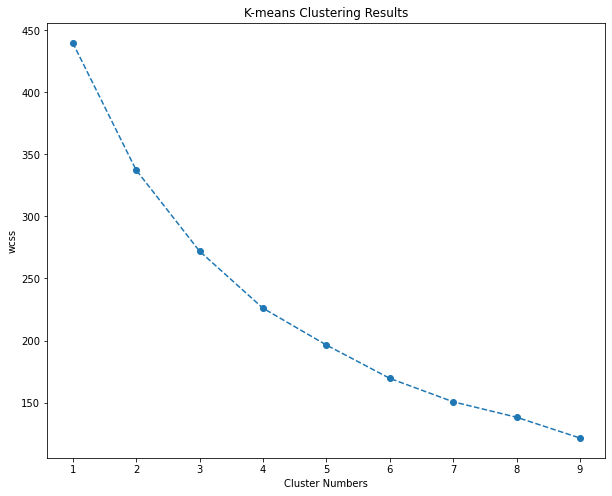

In [19]:
plt.figure(figsize=(10,8))
plt.plot(range(1,10), wcss, marker='o', linestyle='--')
plt.xlabel('Cluster Numbers')
plt.ylabel("wcss")
plt.title("K-means Clustering Results")
plt.show()

### If we use elbow method to graphic you see abose. We can understand we have 4 clusters. Then lets use Kmeans with cluster number 4.

In [20]:
kmeans = KMeans(n_clusters=4, random_state=42)
classes = kmeans.fit_predict(scaled_data)
classes

array([2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 3, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 3, 3, 3, 1, 3, 3, 0, 0, 3, 0,
       0, 1, 2, 1, 1, 1, 3, 3, 1, 1, 3, 3, 1, 1, 3, 3, 1, 1, 2, 1, 1, 1,
       3, 1, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [21]:
data_with_classes = pd.concat([preprocessed_data, pd.DataFrame(classes)],
                            axis=1)
data_with_classes.columns = ["ageg", "alcgp","tobgp", "ncases", "ncontrols","class"]
data_with_classes.head()

,ageg,alcgp,tobgp,ncases,ncontrols,class
0,0,0,0,0,40,2
1,0,0,1,0,10,0
2,0,0,2,0,6,0
3,0,0,3,0,5,0
4,0,2,0,0,27,2


# *DATA SIZE*

In [22]:
print("Raw data size: ", len(preprocessed_data)*len(preprocessed_data.columns))
print("Data size after KMeans: ", len(data_with_classes)*len(data_with_classes.columns))

Raw data size:  440
Data size after KMeans:  528


# *DATA AUGMENTATION.*

### With Seaborn's pairplot function, we can figure out new variables that could help us.

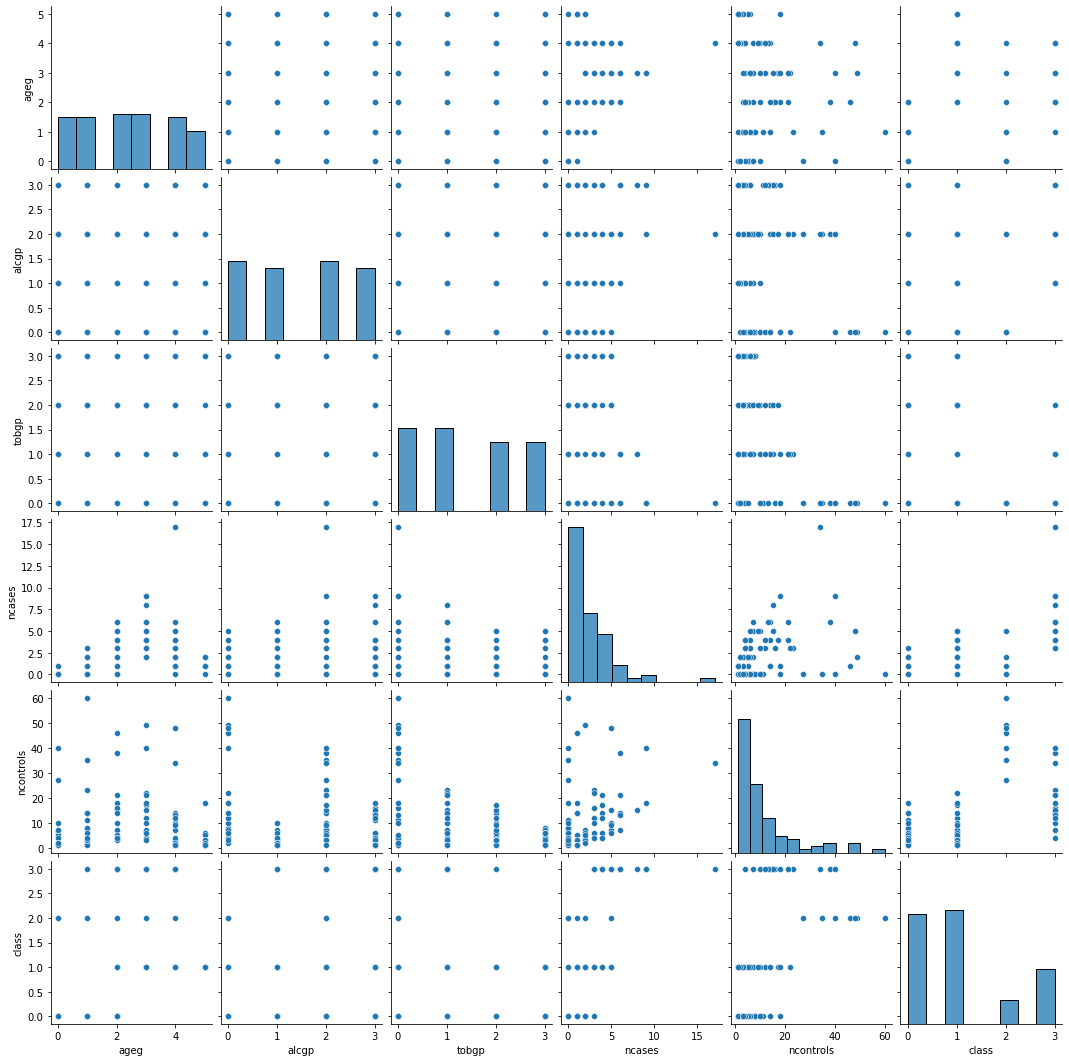

In [23]:
import seaborn as sns

sns.pairplot(data_with_classes)

### As you see above:
#### - alcgp / ncontrols
#### - tobgp / ncontrols
### datas seems informational. Let's create these.

In [24]:
alcgp_ncontrols = alcgp_column / data_with_classes["ncontrols"]

In [25]:
tobgp_ncontrols = tobgp_column / data_with_classes["ncontrols"] 

### Let's add these to out data

In [26]:
augmented_data_columns = ["alcgp_ncontrols","tobgp_ncontrols"]
augmented_data_columns.extend(data_with_classes.columns)
augmented_data = pd.concat([pd.DataFrame(alcgp_ncontrols), pd.DataFrame(tobgp_ncontrols), data_with_classes], axis = 1)
augmented_data.columns = augmented_data_columns
augmented_data.head()

,alcgp_ncontrols,tobgp_ncontrols,ageg,alcgp,tobgp,ncases,ncontrols,class
0,0.000000,0.000000,0,0,0,0,40,2
1,0.000000,0.100000,0,0,1,0,10,0
2,0.000000,0.333333,0,0,2,0,6,0
3,0.000000,0.600000,0,0,3,0,5,0
4,0.074074,0.000000,0,2,0,0,27,2


### Data size comparision after and before data augmentation

In [27]:
print("Data size before data augmentation:", len(data_with_classes) * (len(data_with_classes.columns)-1))
print("Data size after data augmentation:", len(augmented_data) * (len(augmented_data_columns)-1))

Data size before data augmentation: 440
Data size after data augmentation: 616


The steps we did step by step:
- Visualization
- Visual Analysis
- Creating New Variables with Mathematical Operations
- Concatenation of New Variables
#### Visualization:
     With seaborn.pairplot function, if we have n variables we're getting  n x n charts.
#### Visual Analysis:
     By examining the distributions in the charts, we learn which feature relationships are valuable to us.
#### Creating New Variables with Mathematical Operations
     We create a new feature by mathematically processing the valuable features we obtained in the "Visual Analysis" step.
#### Concatenation of New Variables
     We concatenate newly created variables to our DataFrame.

# *TRAIN AND TEST DATA SPLIT.*

In [28]:
X,y = augmented_data.iloc[:,:-1].values, augmented_data.iloc[:,-1:].values

In [29]:
from sklearn.model_selection import StratifiedShuffleSplit

sss = StratifiedShuffleSplit(test_size=0.2,random_state=42)

In [30]:
for train_index, test_index in sss.split(X, y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

TRAIN: [ 4 35 22  5 42  7 11 71 85  1 56 55 38 59 30 47 32 80 33 76 52 29 60 48
 15 27 69 77 18 21 65 50 54 37 10 64 45 83 72  2  6 53 31 75 74 20 14 43
  0 41 19 70 78 79 58 44 61 23 46 86  3 57 28 26 81 39 13 49 16 51] TEST: [24  9 34 67 63 66 36 73 82 40 68 17 25  8 62 12 87 84]
TRAIN: [84  3 79 17 40 60 86 85 71 45  4 42 10 62 47 41 36 34 65 18  9 27  1 46
 63 70 15 53 13 25 35 50 49 51 22 69 75  6  5 30 43 68 21 59 52 73 83 82
  7 80 14 48 29 28 58 44 61 37 72 56  0 31 64 38 66 12 77 54 24 16] TEST: [67 26  2 87 23 20 57 55 32 19 76 81 78 11 33  8 74 39]
TRAIN: [ 6 18 28 40 60 42 21 74 51 69  9 56 11 13 63 76  4 12 53 48 70 19 66 58
  8 50 87 68 82 41  3 10 31 23 61 81 64 34 16 24 65 54 22 29 84 52 78 71
 67 39 14 85 26 15 45 62 43 49 57 80  0  7 27 73 46 83 35 38  5 55] TEST: [59  1 44 37 72 79 17 20 86 33 25 32 36 30 47 77  2 75]
TRAIN: [64 32 19 18 58 56 66 68  4 27 82  7 14 61  8 80  2 53 44 74 87 49 16 38
 35 34 24  3 67 81 29 55 77 13 12 86 84 47 62  0 36 57 48 75 46  5 79 2

# *PCA AND LDA.*

### PCA (Principal Component Analysis) main target is zipping the data and holding only valuable data. By this skill of PCA, it can be use for either data augmentation and preprocessing.

### *PCA*

In [31]:
from sklearn.decomposition import PCA

# Create principal components
pca = PCA(n_components=3)
PcaX_train = pca.fit_transform(X_train)
PcaX_test = pca.transform(X_test)

component_names = [f"PC{i+1}" for i in range(PcaX_train.shape[1])]
PcaX_train = pd.DataFrame(PcaX_train, columns=component_names)
PcaX_test = pd.DataFrame(PcaX_test, columns=component_names)
print(PcaX_train.head())
print(PcaX_test.head())

         PC1       PC2       PC3
0  14.856252 -3.833557 -1.172385
1  -2.819208  3.196788  0.575729
2   0.067634  0.563208  0.624805
3 -11.247048 -0.088571  1.358461
4 -11.030277 -1.352415 -1.712126
         PC1       PC2       PC3
0   3.405102  5.482945 -1.155043
1 -11.174296 -2.075535 -1.752625
2  22.820716 -4.072640 -0.149778
3  -8.889074 -0.144775 -0.909518
4   2.177068  1.726879  1.453106


### *LDA*

 ### LDA, which stands for Linear Discriminant Analysis, is similar to PCA in terms of size reduction logic. But in PCA there is no concept of class. However, in PCA -unlike LDA- there is no concept of class . LDA  is intended to increase the difference between classes. Which is why, as you will see below, we do not introduce the target class to the algorithm when fitting PCA, but we do introduce it in LDA.

In [32]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components = 3)

LdaX_train = lda.fit_transform(X_train, y_train.ravel())
LdaX_test = lda.transform(X_test)

component_names = [f"PC{i+1}" for i in range(LdaX_train.shape[1])]
LdaX_train = pd.DataFrame(LdaX_train, columns=component_names)
LdaX_test = pd.DataFrame(LdaX_test, columns=component_names)
print(LdaX_train.head())
print(LdaX_test.head())

        PC1       PC2       PC3
0  4.073420 -1.182229  0.898818
1 -1.981324  1.714466  0.019272
2 -0.875660  0.241864 -1.080865
3 -1.588514  0.333043 -1.816982
4  0.429509 -2.624846  1.598497
        PC1       PC2       PC3
0 -0.624954  2.252200  2.543637
1  0.554358 -3.333896  0.582915
2  4.622328 -0.096016 -0.248213
3  0.031364 -1.554308  1.741003
4 -0.817155  1.328188 -0.948959


In [33]:
print("\033[2;37;RAW VARIABLES - TARGET CLASS CORRELATIONS")
print(pd.concat([pd.DataFrame(X_train), pd.DataFrame(y_train)],axis=1).corr().iloc[:,-1])
print("PCA APPLIED VARIABLES - TARGET CLASS CORRELATIONS")
print(pd.concat([pd.DataFrame(PcaX_train), pd.DataFrame(y_train)],axis=1).corr().iloc[:,-1])
print("LDA APPLIED VARIABLES - TARGET CLASS CORRELATIONS")
print(pd.concat([pd.DataFrame(LdaX_train), pd.DataFrame(y_train)],axis=1).corr().iloc[:,-1])

AW VARIABLES - TARGET CLASS CORRELATIONS
0   -0.237301
1   -0.326274
2    0.361620
3    0.157156
4   -0.485862
5    0.690005
6    0.558378
0    1.000000
Name: 0, dtype: float64
PCA APPLIED VARIABLES - TARGET CLASS CORRELATIONS
PC1    0.566466
PC2    0.558867
PC3    0.079354
0      1.000000
Name: 0, dtype: float64
LDA APPLIED VARIABLES - TARGET CLASS CORRELATIONS
PC1    0.279661
PC2    0.734401
PC3    0.246430
0      1.000000
Name: 0, dtype: float64


**LDA and PCA downgraded to same dimension for having a fair comparision*

### PCA - RAW - LDA comparison with Logistic Regression

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr_ham = LogisticRegression()
lr_pca = LogisticRegression()
lr_lda = LogisticRegression()

# By .ravel(), we're getting a 1d array
lr_ham.fit(X_train, y_train.ravel())
lr_pca.fit(PcaX_train, y_train.ravel())
lr_lda.fit(LdaX_train, y_train.ravel())

preds_ham = lr_ham.predict(X_test)
preds_pca = lr_pca.predict(PcaX_test)
preds_lda = lr_lda.predict(LdaX_test)

acc_ham = accuracy_score(y_test,preds_ham)
acc_pca = accuracy_score(y_test,preds_pca)
acc_lda = accuracy_score(y_test,preds_lda)

print("RAW DATA ACCURACY: ",acc_ham)
print("PCA DATA ACCURACY: ",acc_pca)
print("LDA DATA ACCURACY: ",acc_lda)


RAW DATA ACCURACY:  1.0
PCA DATA ACCURACY:  0.8333333333333334
LDA DATA ACCURACY:  0.9444444444444444


C:\Users\ABRA\.conda\envs\tensor_gpu\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# *kNN, SVM, ADABOOST, NAIVE BAYES ALGORITHM'S TEST ON TEST DATA*

In [35]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier

### According to last results we get in PCA-LDA-RAW data comparison, we're gonna use raw data for these tests

In [36]:
# To store accuracy results
results = dict()

In [37]:
#kNN

knn = KNeighborsClassifier()
knn.fit(X_train, y_train.ravel())
preds = knn.predict(X_test)
results["knn"] = accuracy_score(y_test,preds)

In [38]:
#SVC

svc = SVC()
svc.fit(X_train, y_train.ravel())
preds = svc.predict(X_test)
results["svc"] = accuracy_score(y_test,preds)

In [39]:
#MultinomialNB

bayes = MultinomialNB()
bayes.fit(X_train, y_train.ravel())
preds = bayes.predict(X_test)
results["NBayes"] = accuracy_score(y_test,preds)

In [40]:
#AdaBoostClassifier

ABC = AdaBoostClassifier()
ABC.fit(X_train, y_train.ravel())
preds = ABC.predict(X_test)
results["AdaBoost"] = accuracy_score(y_test,preds)

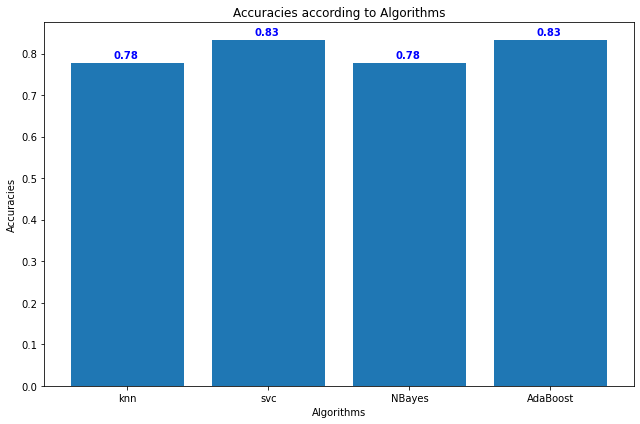

In [41]:
ax = plt.figure(figsize=(9,6))
plt.bar(results.keys(),results.values())
plt.xlabel("Algorithms")
plt.ylabel("Accuracies")
plt.title("Accuracies according to Algorithms")

for i, v in enumerate(results.values()):
    plt.text(x = i-.1, y = v+.01 , s = f"{v:.2f}", color="blue", fontweight="bold")
plt.tight_layout()
plt.show()

### Adaboost and SVC like Multinomial Naive Bayes and kNN gave same results in between each other. Adaboost and SVC gave better results to us comparing to Multinomial Naive Bayes and kNN.

# *CNN*

In [42]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input, Flatten
from tensorflow.keras.layers import Dropout, Conv1D
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import MaxPooling1D

In [43]:
# Take a look to our data shapes
print(X_train.shape)
print(X_train[0].shape)
print(X_train[0])

(70, 7)
(7,)
[ 0.07407407  0.          0.          2.          0.          0.
 27.        ]


### We're gonna use layers which make changes data shape like MaxPooling1D and Conv1D and these layers are working with 3 dimensional data, because of this we'll upgrade our data dimension from 2 to 3. By numpy.ndarray.reshape(), this job can easily over.

In [44]:
sample_size = X_train.shape[0]
time_steps = X_train.shape[1]
input_dimension = 1
input_shape = (sample_size, time_steps, input_dimension)
X_train_data_reshaped = X_train.reshape(input_shape)

print("Dataset shape after reshape:", X_train_data_reshaped.shape)
print("A sample's shape: ",X_train_data_reshaped[0].shape)
print("Sample data: \n", X_train_data_reshaped[0])

Dataset shape after reshape: (70, 7, 1)
A sample's shape:  (7, 1)
Sample data: 
 [[ 0.07407407]
 [ 0.        ]
 [ 0.        ]
 [ 2.        ]
 [ 0.        ]
 [ 0.        ]
 [27.        ]]


In [45]:
# Doing same steps also for test data
X_test_data_reshaped = X_test.reshape(X_test.shape[0],X_test.shape[1],1)
X_test_data_reshaped.shape

(18, 7, 1)

In [46]:
#Model architecture
def build_cnn_model():

  n_timesteps = X_train_data_reshaped.shape[1] #7
  n_features  = X_train_data_reshaped.shape[2] #1

  model = Sequential(name="model_conv1D")

  model.add(Input(shape=(n_timesteps,n_features)))
  model.add(Conv1D(filters=64, kernel_size=3, activation='relu', name="Conv1D_1"))
  model.add(Dropout(0.5)) # To avoid overfitting
  model.add(Conv1D(filters=32,kernel_size=3, activation='relu', name="Conv1D_2"))

  model.add(MaxPooling1D(pool_size=2, name="MaxPooling1D")) 

  model.add(Flatten())
  model.add(Dense(32, activation='relu', name="Dense_1"))
  model.add(Dense(n_features, name="Dense_2"))


  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',optimizer=optimizer,metrics=['mae'],)
  return model

cnn_model = build_cnn_model()
cnn_model.summary()

Model: "model_conv1D"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv1D_1 (Conv1D)            (None, 5, 64)             256       
_________________________________________________________________
dropout (Dropout)            (None, 5, 64)             0         
_________________________________________________________________
Conv1D_2 (Conv1D)            (None, 3, 32)             6176      
_________________________________________________________________
MaxPooling1D (MaxPooling1D)  (None, 1, 32)             0         
_________________________________________________________________
flatten (Flatten)            (None, 32)                0         
_________________________________________________________________
Dense_1 (Dense)              (None, 32)                1056      
_________________________________________________________________
Dense_2 (Dense)              (None, 1)                

In [47]:
# Training
cnn_model.fit(X_train_data_reshaped,y_train,
            epochs = 100,
            validation_data=(X_test_data_reshaped, y_test)
            )

Epoch 1/100
3/3 [==============================] - 6s 125ms/step - loss: 2.5498 - mae: 1.2073 - val_loss: 1.0513 - val_mae: 0.7336
Epoch 2/100
3/3 [==============================] - 0s 13ms/step - loss: 1.1122 - mae: 0.7888 - val_loss: 0.8341 - val_mae: 0.6481
Epoch 3/100
3/3 [==============================] - 0s 13ms/step - loss: 0.9495 - mae: 0.7314 - val_loss: 0.7402 - val_mae: 0.6955
Epoch 4/100
3/3 [==============================] - 0s 12ms/step - loss: 0.9606 - mae: 0.7685 - val_loss: 0.7196 - val_mae: 0.7288
Epoch 5/100
3/3 [==============================] - 0s 13ms/step - loss: 0.7581 - mae: 0.6983 - val_loss: 0.6847 - val_mae: 0.6340
Epoch 6/100
3/3 [==============================] - 0s 12ms/step - loss: 0.8472 - mae: 0.7119 - val_loss: 0.6410 - val_mae: 0.6637
Epoch 7/100
3/3 [==============================] - 0s 14ms/step - loss: 0.8219 - mae: 0.7186 - val_loss: 0.6107 - val_mae: 0.6125
Epoch 8/100
3/3 [==============================] - 0s 13ms/step - loss: 0.7595 - mae: 0.6

In [48]:
# Predictions
preds = cnn_model.predict(X_test_data_reshaped)

In [49]:
# I used round() like an activasion function.
preds = [int(round(pred)) for pred in preds.ravel()]
preds = np.array(preds)
preds[np.where(preds>=4)] = 3
preds[np.where(preds<=0)] = 0
preds 

array([3, 0, 1, 2, 1, 1, 0, 1, 0, 2, 1, 0, 1, 1, 1, 2, 0, 1])

In [50]:
# Some metrics to examine results
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score
print("\033[2;37;40mCONFUSION MATRIX :")
print(confusion_matrix(y_test.ravel(),preds))
print("ACCURACY:")
print(accuracy_score(y_test.ravel(),preds))
print("RECALL: ")
print(recall_score(y_test.ravel(),preds, average='macro'))
print("PRECISION: ")
print(precision_score(y_test.ravel(),preds, average='macro'))
print("F1 SCORE: ")
print(f1_score(y_test.ravel(),preds, average='macro'))


CONFUSION MATRIX :
[[5 1 1 0]
 [0 7 0 0]
 [0 1 0 0]
 [0 0 2 1]]
ACCURACY:
0.7222222222222222
RECALL: 
0.511904761904762
PRECISION: 
0.6944444444444444
F1 SCORE: 
0.5520833333333334


# *Voting Classifier*

### The idea behind the VotingClassifier is to combine conceptually different machine learning classifiers and use a majority vote or the average predicted probabilities (soft vote) to predict the class labels. Such a classifier can be useful for a set of equally well performing model in order to balance out their individual weaknesses. <a href= https://scikit-learn.org/stable/modules/ensemble.html#voting-classifier>This paragraph taken by original sklearn.ensemble.VotingClassifier documentation</a>

In [51]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier

In [52]:
# Selected Algorithms for Voting Classifier
clf1 = LogisticRegression(multi_class='multinomial', solver = "newton-cg",random_state=1)
clf2 = RandomForestClassifier(n_estimators=50, random_state=1)
clf3 = MultinomialNB()

VC = VotingClassifier(estimators=[
        ('lr', clf1), ('rf', clf2), ('mnb', clf3)])
VC.fit(X_train, y_train.ravel())
preds = VC.predict(X_test)
print("Accuracy score:", accuracy_score(y_test, preds))

Accuracy score: 1.0
